<img src="images/ub_si.png" height="225" width="100%" />

# **N. W. Kusuma** || **`Big Data Final Exam`**

***
# **Libraries**
***
## Import common libraries

In [159]:
import pandas as pd 
import numpy as np 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline 

## Setting compiler options
***

In [160]:
import warnings
#warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
print(os.listdir("./datasets"))

import xlrd

plt.style.use('bmh')
sns.set_style('whitegrid')
pd.set_option("display.float_format", '{:.2f}'.format)


['UAS_PCA dan Multi Linear Regression.xlsx', 'UAS_RFM.xlsx', 'UAS_SVM.xlsx']


***
# **Data Understanding**
***
## Get the data
- ### Load data files (`UAS_PCA dan Multi Linear Regression.xlsx`)
- ### And display the first five row subset.

In [161]:
dataset = pd.read_excel("./datasets/UAS_PCA dan Multi Linear Regression.xlsx")

dataset.head()

,Customer ID,Umur,Income,Product_holding,Saving,Deposit,KK,Tab Bisnis,Limit Kredit Mortgage,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1234561175,27,18044724,3,30496813,22079895,856297,0,4537131469,1,1,1,0
1,1234561810,53,41844607,3,5459323,0,599572,17479146,2515048708,1,0,1,1
2,1234561778,52,34437700,2,34261341,0,2743516,0,2021012050,1,0,1,0
3,1234561915,40,45774220,4,27771816,18639840,4534694,18489681,617757979,1,1,1,1
4,1234561363,55,35452808,2,38657479,0,0,11176695,4157711017,1,0,0,1


## Explore the data
***
- ### Inspect data structures, data desciption summary, missing values, etc.
- ### Also, lets inspect the four `Unnamed` columns, they might be useful columns or not. 

In [162]:
def inspect_data(df, note=None):
      try:
            pd.set_option("display.width", 150)
            print(f"{'*'*126}\n\tBCA Syariah Bank`s Credit Limit modeling for KPR (Home Loan/Mortgage) product application.\n"
                  f"{'='*126}\n\t\tThe data contains of `{df.shape[0]}` entries and `{df.shape[1]}` columns.\n"      
                  f"{'-'*126}\n\t\tColumns:\t\tdtypes:\t\t# Unique:\t# NaN:")
            for i in range(len(df.columns)):
                  if len(df.columns.values[i]) >= 16: s = '\t'
                  elif len(df.columns.values[i]) >= 8: s = '\t\t'
                  else: s = '\t\t\t'
                  print(f"\t\t{df.columns.values[i]}{s}"
                        f"{np.dtype(df.iloc[:,i])}\t\t"
                        f"{df.iloc[:,i].nunique()}\t\t"
                        f"{df.iloc[:,i].isnull().sum()}") 
            print(f"{'='*126}\n{df.describe().T}")
      finally:
            if note != None: print(f"{'='*126}\nNote:\n{note}\n{'*'*126}")
            else: print('*'*126)
            pd.reset_option("display.width")

In [163]:
note = "The `Unnamed: 9` column seems to have a singular value and doesn't look like it meant anything at all.\nLets check the correlations between columns."
inspect_data(dataset, note)

******************************************************************************************************************************
	BCA Syariah Bank`s Credit Limit modeling for KPR (Home Loan/Mortgage) product application.
		The data contains of `999` entries and `13` columns.
------------------------------------------------------------------------------------------------------------------------------
		Columns:		dtypes:		# Unique:	# NaN:
		Customer ID		int64		645		0
		Umur			int64		36		0
		Income			int64		999		0
		Product_holding		int64		4		0
		Saving			int64		999		0
		Deposit			int64		497		0
		KK			int64		503		0
		Tab Bisnis		int64		513		0
		Limit Kredit Mortgage	int64		999		0
		Unnamed: 9		int64		1		0
		Unnamed: 10		int64		2		0
		Unnamed: 11		int64		2		0
		Unnamed: 12		int64		2		0
                       count          mean           std           min           25%           50%           75%           max
Customer ID           999.00 1234561484.17        288.79 1234561000.00 1234561227.

Correlations matrix between features:


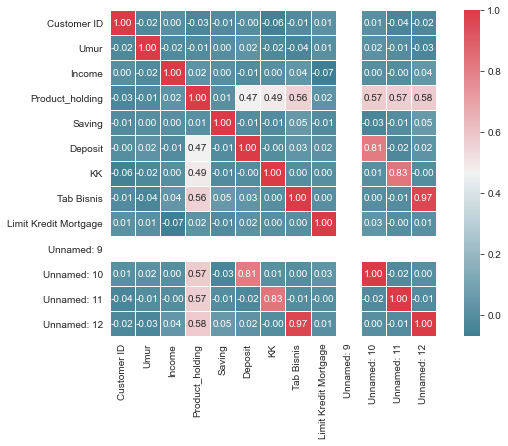

In [164]:
try: 
    pd.set_option("display.width", 250)
    #Generate correlation matrix
    corr = dataset.corr()
    #print(f"Correlations matrix between features:\n{corr}")
    print(f"Correlations matrix between features:")

    #Set the width and hieght of the plot
    f, ax = plt.subplots(figsize=(10, 6))
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), 
                cmap=sns.diverging_palette(220, 10, as_cmap=True),
                square=True, ax=ax, annot=True, fmt='.2f', linewidths=0.5);
finally:
    pd.reset_option("display.width")

## Interpreting the matrix
***
- ### As expected the column `Unnamed: 9`, doesn't have linear correlation with other columns even with it self.
- ### The `Unnamed: 10` column have highly positive relation with `Deposit`.
- ### Likewise, the `Unnamed: 11` column have highly positive relation with `KK`.
- ### And the `Unnamed: 12` column positively corresponds with the `Tab Bisnis`. 
- ### These three columns must be an indication of whether the customer have the corresponding features or not.
- ### Following these patern, the `Unnamed: 9` column must be supposed to related with the customer having a `Saving`.


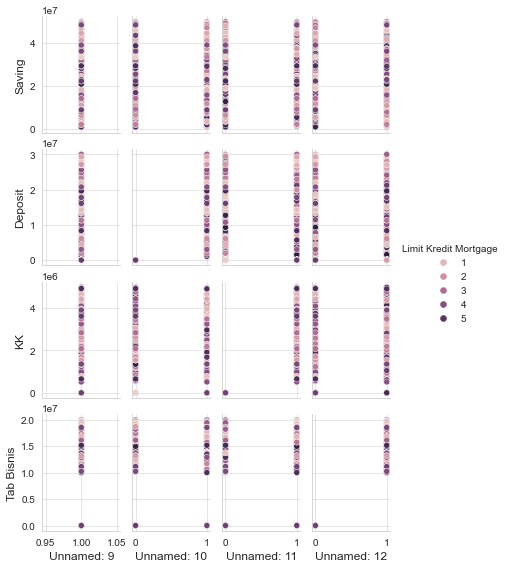

In [165]:
sns.pairplot(data=dataset, x_vars=["Unnamed: 9", "Unnamed: 10", "Unnamed: 11", "Unnamed: 12"], 
                           y_vars=['Saving', 'Deposit', 'KK', "Tab Bisnis"], 
                           hue="Limit Kredit Mortgage", height=2, aspect=0.7, diag_kind=None);

In [166]:
# Drop `Unnamed: 9` column
dataset.drop(dataset.columns[-4], axis=1, inplace=True)
dataset.head()

,Customer ID,Umur,Income,Product_holding,Saving,Deposit,KK,Tab Bisnis,Limit Kredit Mortgage,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1234561175,27,18044724,3,30496813,22079895,856297,0,4537131469,1,1,0
1,1234561810,53,41844607,3,5459323,0,599572,17479146,2515048708,0,1,1
2,1234561778,52,34437700,2,34261341,0,2743516,0,2021012050,0,1,0
3,1234561915,40,45774220,4,27771816,18639840,4534694,18489681,617757979,1,1,1
4,1234561363,55,35452808,2,38657479,0,0,11176695,4157711017,0,0,1


## Rename the column
***
- ### Rename the `Unnamed: 9`, `Unnamed: 10`, `Unnamed: 11`, and `Unnamed: 12` columns accordingly.
- ### Replace the `whitespace` in the column\`s names with `underscore`.

In [167]:
#colnames = ['Has_Saving', 'Has_Deposit', 'Has_KK', 'Has_Tab_Bisnis']
colnames = ['Has_Deposit', 'Has_KK', 'Has_Tab_Bisnis']
for i in range(len(dataset.iloc[:,-3:].columns)):
    dataset.rename(columns={dataset.iloc[:,-3:].columns[i]:colnames[i]}, inplace=True)
dataset.columns = dataset.columns.str.replace(' ','_')

inspect_data(dataset)

******************************************************************************************************************************
	BCA Syariah Bank`s Credit Limit modeling for KPR (Home Loan/Mortgage) product application.
		The data contains of `999` entries and `12` columns.
------------------------------------------------------------------------------------------------------------------------------
		Columns:		dtypes:		# Unique:	# NaN:
		Customer_ID		int64		645		0
		Umur			int64		36		0
		Income			int64		999		0
		Product_holding		int64		4		0
		Saving			int64		999		0
		Deposit			int64		497		0
		KK			int64		503		0
		Tab_Bisnis		int64		513		0
		Limit_Kredit_Mortgage	int64		999		0
		Has_Deposit		int64		2		0
		Has_KK			int64		2		0
		Has_Tab_Bisnis		int64		2		0
                       count          mean           std           min           25%           50%           75%           max
Customer_ID           999.00 1234561484.17        288.79 1234561000.00 1234561227.50 1234561472.00 1234561734

# **Data Preparation**
***
## Assign `target` feature
- ### Choose the `Limit_Kredit_Mortgage` column as the `target` feature.

In [183]:
# Determine target feature
y = dataset['Limit_Kredit_Mortgage']
X = dataset.drop('Limit_Kredit_Mortgage', axis=1)

print(f"\n{'-'*40}\n Dimension of the target: {y.shape}\n\tand the features: {X.shape}\n{'-'*40}\n")


----------------------------------------
 Dimension of the target: (999,)
	and the features: (999, 11)
----------------------------------------



## Splitting the data
***
- ### Dividing the dataset into `training` and `testing` sets.

In [182]:
from sklearn.model_selection import train_test_split

# Split dataset into training and testing set with 70% and 30% proportion respectively.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(f"\n{'*'*45}\n  The dimension of y_train : {y_train.shape}\n\t     "
      f"  and X_train : {X_train.shape}\n{'-'*45}\n"
      f"  The dimension of y_test  : {y_test.shape}\n\t     "
      f"  and X_test  : {X_test.shape}\n{'*'*45}\n")


*********************************************
  The dimension of y_train : (699,)
	       and X_train : (699, 11)
---------------------------------------------
  The dimension of y_test  : (300,)
	       and X_test  : (300, 11)
*********************************************



## Scalling the data
***
- ### We first need to scale and standardize our dataset so we can apply `PCA` to it.
- ### I will use `StandarScaler` to do it.

In [181]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
sc = StandardScaler()

# Fit StandardSacaler to and transform X
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(f"\n{'*'*72}\nDimension of the scaled training set: {X_train.shape}"
      f"\n{'-'*72}\nFirst few subsets of it:\n\n{X_train[5]}\n{'*'*72}\n")
#df_scaled = pd.DataFrame(scaled, columns=df_train.columns)


************************************************************************
Dimension of the scaled training set: (699, 11)
------------------------------------------------------------------------
First few subsets of it:

[ 1.78588136  0.21698211  0.15218691  1.66886068  0.62805251  0.10866765
 -0.60522712 -0.10615742 -0.99987699 -0.34710701 15.81285206]
************************************************************************



# **Data Modeling**
***
## Applying `Principal Component Analysis` model
- ### Fitting and transforming scaled training set into `PCA` model.
- ### Visualize the individual and cummulative `explained variance ratio` of the `PCA`.
- ### The ratio of variance is the `eigenvalue` divided by `total eigenvalues`.


****************************************************************************************
First few subsets of the training set after PCA:

[[ 1.37727081e+07  2.83668871e+06 -1.31708667e+06  7.52684265e+06
   5.31029629e+05 -3.84025358e+02 -1.77900368e+01  1.20199997e+00
   8.71377660e-02 -6.21928250e-02 -1.02770859e-16]
 [-1.99813588e+07  5.98323596e+06 -7.40954983e+06  1.12002469e+07
   1.61111829e+06  3.76127578e+02 -1.63067471e+01 -3.51371713e-01
  -1.22143175e-01 -2.47848505e-01  1.50161294e-17]]
----------------------------------------------------------------------------------------
PCA Variance Ratio:

[4.00687818e-01 2.76171992e-01 2.01001798e-01 1.16945919e-01
 5.19247315e-03 1.61792896e-10 2.13389926e-13 4.95719426e-16
 1.61763777e-16 4.28342239e-17 3.35107399e-47]
----------------------------------------------------------------------------------------
Cumulative Eigenvalues:

[0.40068782 0.67685981 0.87786161 0.99480753 1.         1.
 1.         1.         1.         1.     

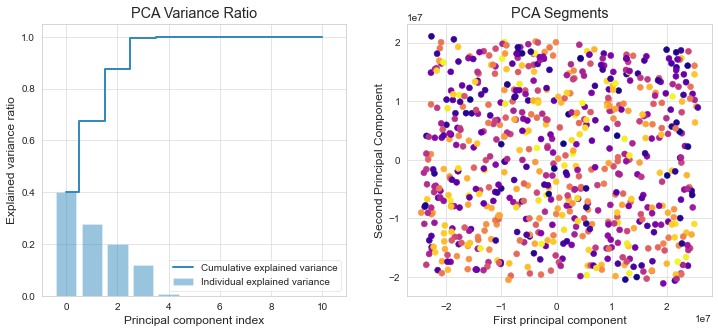

In [184]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

print(f"\n{'*'*88}\nFirst few subsets of the training set after PCA:\n\n{X_train[:2]}"
      f"\n{'-'*88}\nPCA Variance Ratio:\n\n{exp_var_pca}"
      f"\n{'-'*88}\nCumulative Eigenvalues:\n\n{cum_sum_eigenvalues}\n{'*'*88}")

# Create the visualization plot
fig = plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.title("PCA Variance Ratio")
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
#plt.tight_layout()

plt.subplot(1, 2, 2)
plt.scatter(X_train[:,0],X_train[:,1], c=y_train, cmap='plasma')
plt.title("PCA Segments")
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component');

## Applying `Multi-linear Regression`
***
- ### Modeling `Multi-linear Regression` with training datasets.
- ### Evaluate model accuracy by applying it to testing dataset.

In [185]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
mlr_fit = lr.fit(X_train, y_train)

accu = mlr_fit.score(X_test, y_test)
intc = mlr_fit.intercept_
coef = mlr_fit.coef_

print(f"\n{'*'*66}\nAccuracy\t: {accu}\n{'-'*66}\nIntercept\t: {intc}\n{'-'*66}\nCoefficient\t:\n\n{coef}\n{'*'*66}\n")


******************************************************************
Accuracy	: -0.023100130879662117
------------------------------------------------------------------
Intercept	: 3071698467.8468013
------------------------------------------------------------------
Coefficient	:

[-1.24653946e+00 -1.33455747e+01  5.96603587e+00 -3.54244511e-02
 -3.83159921e+00  9.46013855e+04  3.41903213e+06  5.93433569e+07
  1.66116978e+08  4.97226586e+08  1.02940242e-07]
******************************************************************



# **Deployment**
***
## Making prediction
- ### Predict the `target` feature.

In [179]:
y_pred = mlr_fit.predict(X_test)
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print("\nPrediction results:")
df_pred.T


Prediction results:


,722,77,877,613,903,531,399,452,31,356,...,959,862,167,558,986,695,10,105,68,535
Actual,4774520275.00,2921248961.00,2300389852.00,3212048907.00,557037935.00,5278881430.00,4266977191.00,5292947888.00,674367364.00,2100840770.00,...,4193770322.00,789791130.00,5127092289.00,2169014276.00,3313279178.00,3606283728.00,4323765641.00,2614562346.00,3327769299.00,5032667575.00
Predicted,3238238116.01,3015898956.78,3134880182.16,3086314159.86,2961961281.76,3210106943.85,2898182582.89,2839617711.27,3078669470.95,2852421849.39,...,3163226781.23,3284315446.00,3284269769.36,3155875695.06,3107776540.19,3165723156.28,3027639434.74,2807662039.43,3126696593.25,3373697578.25


## Calculating error terms
***
- ### Calculating error terms on prediction results.
- ### Regarding the `Adjusted R2` score, it's calculated as follow:
- ### `Adjusted R2 = 1 – [(1-RSquared)*(n-1)/(n-k-1)]`
- ### `n`: The number of observations, 
- ### `k`: The number of predictor variables

In [177]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculating error terms
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)
adj_r_squared = 1 - ((1 - r_squared)*(len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

# Adjusted R2 = 1 – [(1-RSquared)*(n-1)/(n-k-1)]
# n: The number of observations, k: The number of predictor variables

print(f"\n{'*'*54}"
      f"\n{' '*7}Mean Absolute Error : {mae:.3f}"  
      f"\n{' '*8}Mean Squared Error : {mse:.3f}"  
      f"\n{' '*3}Root Mean Squared Error : {rmse:.3f}\n\n{'-'*54}"
      f"\n{' '*11}R-Squared Score : {r_squared:.5f}"
      f"\n{' '*2}Adjusted R-Squared Score : {adj_r_squared:.5f}"
      f"\n{'*'*54}")


******************************************************
       Mean Absolute Error : 1407841418.288
        Mean Squared Error : 2675298976228985344.000
   Root Mean Squared Error : 1635634120.526

------------------------------------------------------
           R-Squared Score : -0.02310
  Adjusted R-Squared Score : -0.06218
******************************************************
